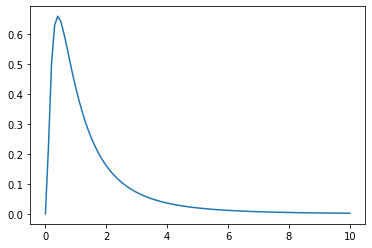

In [115]:
from scipy import stats, integrate
import matplotlib.pyplot as plt
import numpy as np
from main import cdf, _cdf as cdf_

# pdf = lambda x: stats.norm.pdf(x, loc=5)
pdf = lambda x: stats.lognorm.pdf(x, s=0.95)
# pdf = lambda x: stats.beta.pdf(x, a=10, b=2, scale=10)
values = np.linspace(0,10,num=100)
plt.plot(values, [pdf(v) for v in values])

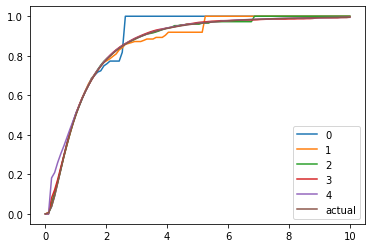

In [174]:
# samples = [sorted(stats.norm.rvs(loc=5, size=5)) for _ in range(4000)]
samples = [sorted(stats.lognorm.rvs(s=0.9, size=5)) for _ in range(4000)]
# samples = [sorted(stats.beta.rvs(a=10, b=2, scale=10, size=5)) for _ in range(4000)]

order_statistics = {}
cdf_estimates = []
kde_cdf_estimates = []

for i in range(5):
    order_stats = [sample[i] for sample in samples]
    order_statistics[f"{i}"] = order_stats
    
    kde_pdf = stats.gaussian_kde(order_stats, bw_method=0.08)
    kde_cdf = lambda x, kde_pdf=kde_pdf: integrate.quad(kde_pdf, a=0, b=x)[0]
    
    kde_cdf_estimates.append(kde_cdf)
    parent_cdf = lambda x, i=i, kde_cdf=kde_cdf: cdf(x, kde_cdf, i+1, 5)
    cdf_estimates.append(parent_cdf)
    
values = np.linspace(0,10,num=100)

for i, _cdf in enumerate(cdf_estimates):
    plt.plot(values, [_cdf(v) for v in values], label=i)
    
plt.plot(values, [stats.lognorm.cdf(v, s=0.9) for v in values], label="actual")
# plt.plot(values, [stats.norm.cdf(v, loc=5) for v in values], label="actual")
# plt.plot(values, [stats.beta.cdf(v, a=10, b=2, scale=10) for v in values], label="actual")
    
plt.legend()

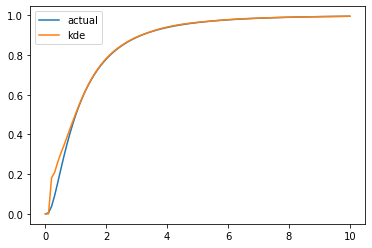

In [175]:
values = np.linspace(0,10,num=100)
plt.plot(values, [stats.lognorm.cdf(v, s=0.9) for v in values], label="actual")
# plt.plot(values, [stats.norm.cdf(v, loc=5) for v in values], label="actual")
# plt.plot(values, [stats.beta.cdf(v, a=10, b=2, scale=10) for v in values], label="actual")

plt.plot(values, [cdf(v, kde_cdf_estimates[4], 5, 5) for v in values], label="kde")
# plt.plot(values, [cdf_estimates[-1](v) for v in values], label="kde")
plt.legend()

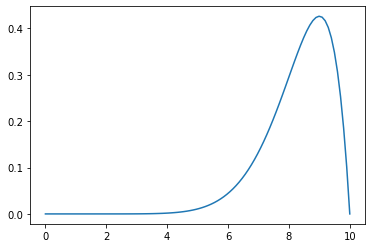

In [130]:
pdf = lambda x: stats.beta.pdf(x, a=10, b=2, scale=10)
values = np.linspace(0,10,num=100)
plt.plot(values, [pdf(v) for v in values])

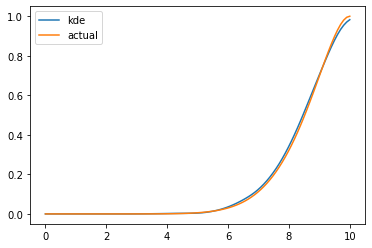

In [158]:
drawings = stats.beta.rvs(a=10,b=2,scale=10,size=1000)
kde = stats.gaussian_kde(drawings)
kde_cdf = lambda x: integrate.quad(kde, a=0, b=x)[0]
plt.plot(values, [kde_cdf(v) for v in values], label="kde")
plt.plot(values, [stats.beta.cdf(v, a=10,b=2,scale=10) for v in values], label="actual")
plt.legend()

In [73]:
kde_cdf_estimates[0](8)

0.9994061718192063

In [74]:
cdf_(0, lambda x:0.9994061718192063, 1, 10)

0.5242639302465082